In [416]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


#file_path = 'spotify_10_songs.csv'
df_songs = pd.read_csv('spotify_5000_songs.csv')#, index_col='artist')
#df_songs.info()
#print(df_songs.columns)

#df_songs.drop(columns=['Unnamed: 0'], inplace=True)
df_songs.rename(columns={'Unnamed: 0': 'id'}, inplace=True)


df_songs.columns = df_songs.columns.str.strip()
df_songs['name'] = df_songs['name'].str.rstrip(' .')
df_songs['name'] = df_songs['name'].str.split().str[:2].str.join(' ') #shorten the song's name
df_songs.head()
df_songs_original = df_songs.copy()

to_drop=[ 'key',
          'mode',
          'type',
          'duration_ms',
          'time_signature',
          'id',
         # 'html',
          'artist',
          'liveness',
          'speechiness',
          'loudness',
          'energy',
          #'acousticness',
          # 'instrumentalness',
          'valence',
         'tempo',
          'danceability'
        ]

#to_drop = ['artist', 'html', 'id', 'time_signature', 'duration_ms', 'mode','key', 'type']
df_songs = df_songs.drop(columns=to_drop)
df_songs = df_songs.drop_duplicates()
df_songs= df_songs.set_index(['name', 'html'])
df_songs

,,acousticness,instrumentalness
name,html,,
Se Eu,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.694,0.000059
Saudade De,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217,0.000002
"Canta Canta,",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.453,0.000063
Mulher Eu,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.879,0.000041
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.916,0.000343
...,...,...,...
1812 Festival,https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.917,0.715000
Winter Fragments,https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.855,0.426000
Schoenberg: 5,https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.951,0.969000


In [417]:
#Min and Max Scaling

# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") 
# Scale the df_songs
df_songs_scaled_minmax = scaler.fit_transform(df_songs)

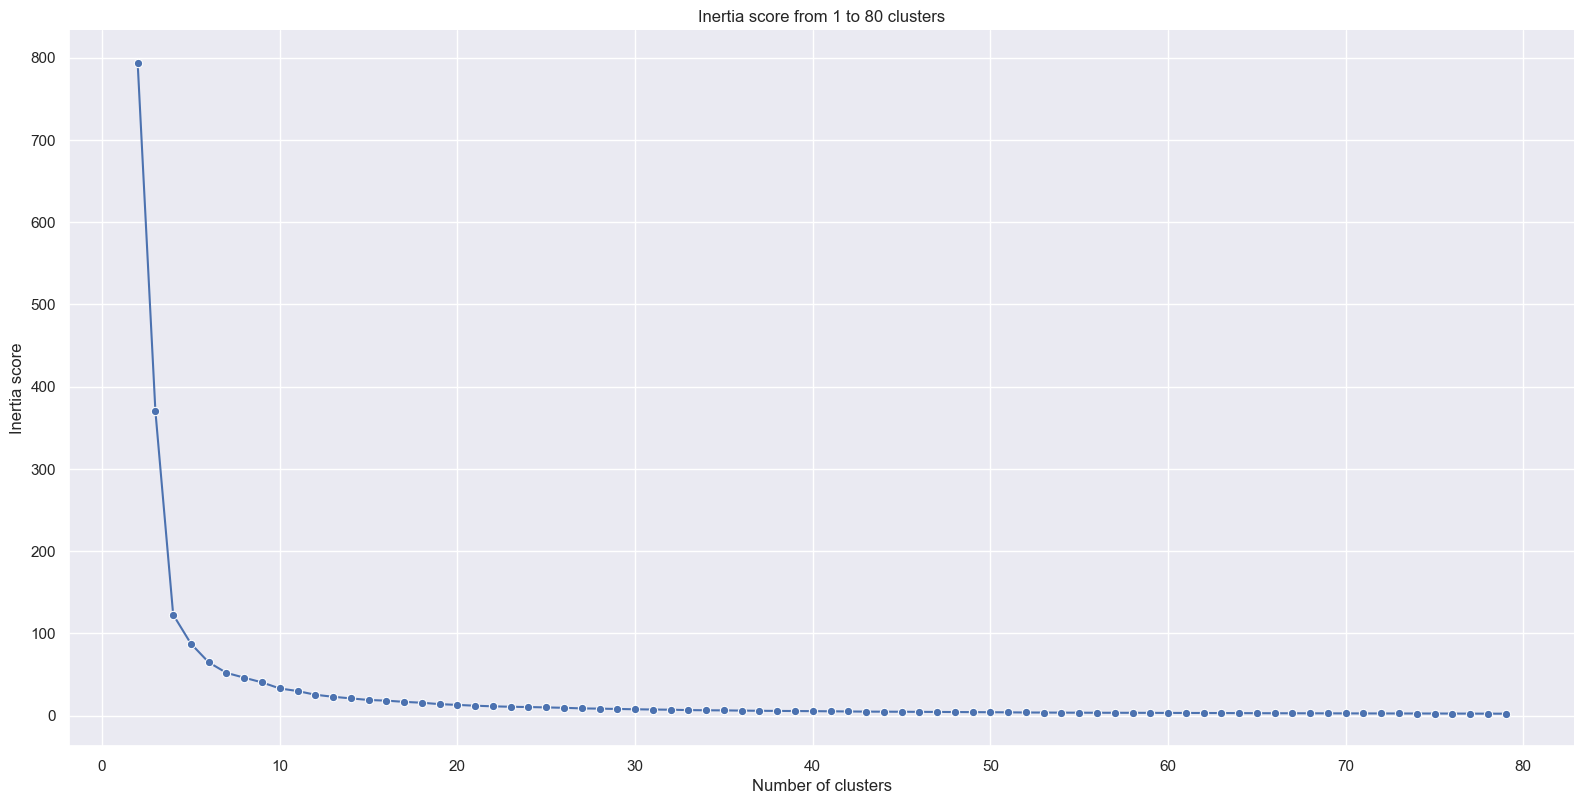

In [418]:
inertia_list = []
seed=234
min_k = 2
max_k = 80

for i in range(min_k,max_k):
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)
    myKMeans.fit(df_songs_scaled_minmax)
    inertia_list.append(myKMeans.inertia_)
    
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(min_k,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

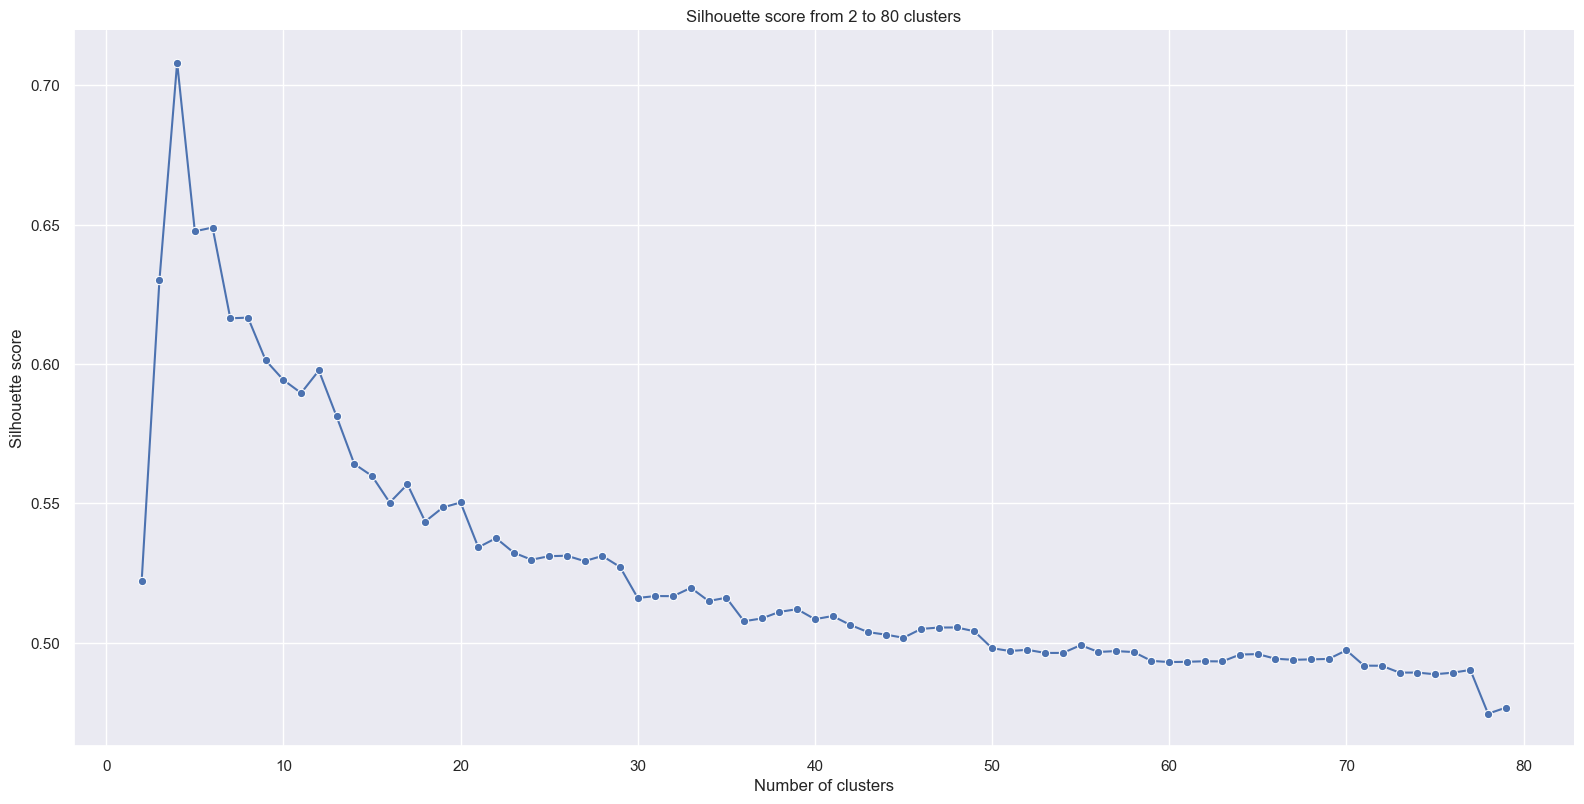

In [419]:
seed=234
min_k = 2
max_k = 80

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(min_k, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(df_songs_scaled_minmax)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(df_songs_scaled_minmax, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)
    
    
sns.set_theme(style='darkgrid')

(
sns.relplot(y=sil_scores,
            x=range(min_k,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 2 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [338]:
# K-Means

In [420]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 37)

# 3. fit the model to the data
my_kmeans.fit(df_songs_scaled_minmax) # pass your scaled data here

# 4. obtain the cluster output
clusters = my_kmeans.labels_

# 5. attach the cluster output to our original DataFrame
df_songs_scaled_minmax_cluster = df_songs_scaled_minmax.copy()
df_songs_scaled_minmax_cluster["cluster"] = clusters

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [396]:
df_songs_scaled_minmax_cluster.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5171 entries, ('Se Eu', 'https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7') to ('Ravel: Boléro,', 'https://open.spotify.com/track/7E1ErYYCn0lYjHODZ1qGuB')
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5171 non-null   float64
 1   energy            5171 non-null   float64
 2   instrumentalness  5171 non-null   float64
 3   cluster           5171 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 495.8+ KB


In [421]:
df_songs_scaled_minmax_cluster.sort_values(by='cluster', ascending=False)

,,acousticness,instrumentalness,cluster
name,html,,,
Bitter Loss,https://open.spotify.com/track/4gvvFHPhWRP63no8rYLRL4,0.000002,0.732995,36
Blood and,https://open.spotify.com/track/3jagGO7eHHuaD53ibehkux,0.000009,0.740102,36
World Eater,https://open.spotify.com/track/2UnDZRV3PKN1Fa6q9lQOV8,0.000006,0.755330,36
Legacy of,https://open.spotify.com/track/5vWydwofUmXEwbitMyPpBa,0.000001,0.715736,36
Where Sinners,https://open.spotify.com/track/1exifXIprZk8bGITlot139,0.000055,0.728934,36
...,...,...,...,...
Pulverized,https://open.spotify.com/track/5leGI7UwCvean9h1rlG3Ty,0.000007,0.941117,0
The Bleeding,https://open.spotify.com/track/17X3hKnGxGle8QRpead0Ks,0.000004,0.921827,0
Serenade In,https://open.spotify.com/track/1gPskfRl7h2a7cm5rCJu2l,0.000062,0.929949,0


In [412]:
#new_df  = df_songs_scaled_minmax_cluster.groupby('cluster').mean().sort_values(by='danceability', ascending=False)
#new_df['danc_and_inst'] = new_df['danceability'] + new_df['instrumentalness']

In [422]:
new_df  = df_songs_scaled_minmax_cluster.groupby('cluster').mean().sort_values(by='instrumentalness', ascending=False)
new_df['inst'] = new_df['instrumentalness'] - new_df['acousticness']
new_df['inst_and_acoust'] = new_df['instrumentalness'] + new_df['acousticness']
new_df['acoust'] = new_df['acousticness'] - new_df['instrumentalness']

In [424]:
new_df.sort_values(by='inst', ascending=False).head(2)

,acousticness,instrumentalness,inst,inst_and_acoust,acoust
cluster,,,,,
0,0.006130,0.943625,0.937495,0.949756,-0.937495
35,0.003003,0.890230,0.887227,0.893233,-0.887227


In [428]:
playlist = df_songs_scaled_minmax_cluster[df_songs_scaled_minmax_cluster['cluster'] ==0 ].sort_values(by='instrumentalness', ascending=False)
playlist.head(10)

,,acousticness,instrumentalness,cluster
name,html,,,
SLVR,https://open.spotify.com/track/3Qntjzw2xY1VDb6x808BPi,0.004598,0.986802,0
Devoured Death,https://open.spotify.com/track/0pgOBcrcBjvgTVQVyW2azU,0.036647,0.983756,0
Devour the,https://open.spotify.com/track/7pfHm4wz7ipZp9q445dMAU,0.000050,0.981726,0
Terror Of,https://open.spotify.com/track/46r1d8k01ylZGcfC64rBpT,0.050502,0.980711,0
Death Evocation,https://open.spotify.com/track/16qW2MNMkXVEjaHphQWqE7,0.000092,0.975635,0
Four Walls,https://open.spotify.com/track/0KPFDdW6AplKCH30dxP79J,0.000023,0.975635,0
Degrading Humanity,https://open.spotify.com/track/52IDL7DONqE7lZYSDRkfgR,0.000001,0.975635,0
Seasons,https://open.spotify.com/track/0pa0bvBkfKxV5nPuidsaJl,0.000243,0.975635,0
Sickish Disease,https://open.spotify.com/track/5UDnX0OPo4ENiL6lZGkQ6y,0.014960,0.974619,0


In [345]:
new_df.sort_values(by='acoust', ascending=False).head(1)

,acousticness,instrumentalness,inst,inst_and_acoust,acoust
cluster,,,,,
12,0.957751,0.008879,-0.948872,0.96663,0.948872


In [358]:
playlist_acoust = df_songs_scaled_minmax_cluster[df_songs_scaled_minmax_cluster['cluster'] == 12]
playlist_acoust

,,acousticness,instrumentalness,cluster
name,html,,,
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348,12
Não Sei,https://open.spotify.com/track/52mwxbVQOtYXntgvyXyBc4,0.981928,0.002000,12
Apelo,https://open.spotify.com/track/55OpI2p7uXEzsDuhNf7Kzn,0.926707,0.000133,12
Corcovado,https://open.spotify.com/track/0bQViEvXvH8iNl8hRRkU5o,0.929719,0.007939,12
Para Machuchar,https://open.spotify.com/track/6YpFxiVx2bpyyiNbrndLka,0.964859,0.010254,12
...,...,...,...,...
Der Weg,https://open.spotify.com/track/7AKqM1fV3UuVDvmfPlGqiU,0.924699,0.000078,12
Amorfoda,https://open.spotify.com/track/68QcquxCS39cQGTsRrJWIR,0.988956,0.000128,12
Faith That,https://open.spotify.com/track/1bXijLYK9IMVFiegCRWDTr,0.929719,0.000000,12


In [359]:
new_df.sort_values(by='inst_and_acoust', ascending=False).head(1)

,acousticness,instrumentalness,inst,inst_and_acoust,acoust
cluster,,,,,
14,0.981173,0.944786,-0.036387,1.925959,0.036387


In [361]:
playlist_inst_and_acoust = df_songs_scaled_minmax_cluster[df_songs_scaled_minmax_cluster['cluster'] == 14]
playlist_inst_and_acoust.sample(20)

,,acousticness,instrumentalness,cluster
name,html,,,
Sadness -,https://open.spotify.com/track/38O0Dm5ejazF9dFGAJmnze,0.978916,0.942132,14
An Ending,https://open.spotify.com/track/1vgSaC0BPlL6LEm4Xsx59J,0.935743,1.000000,14
Relaxing Waltz,https://open.spotify.com/track/5h4WlefaiYH27qIU1XzfOA,0.951807,0.948223,14
Moves Like,https://open.spotify.com/track/7gMPRnvo7NuG1GIdlPdKxR,0.992972,0.938071,14
Forest Meditation,https://open.spotify.com/track/5nOAhrQaLwweLkMvV8X9DD,0.962851,0.967513,14
Story of,https://open.spotify.com/track/4XypqFdSsxoDfAtS02eY1T,0.989960,0.943147,14
Dance Monkey,https://open.spotify.com/track/3UAZD2WcWA4Eic4dIZrZow,0.991968,0.930964,14
Silver Lining,https://open.spotify.com/track/4w7vMUyVony198G1c79PSq,0.991968,0.953299,14
Wind On,https://open.spotify.com/track/5DiwyUEb7jG8iVOaHYMEgl,0.975904,0.944162,14


In [349]:
df_songs_scaled_minmax_cluster.groupby(by='cluster').mean()

,acousticness,instrumentalness
cluster,,
0,0.093115,0.002354
1,0.863236,0.897300
2,0.005451,0.777358
3,0.777064,0.008587
4,0.214723,0.002455
5,0.006123,0.412749
6,0.575274,0.006018
7,0.005478,0.935769
8,0.484151,0.738651


In [350]:
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1
0,0.093115,0.002354
1,0.863236,0.897300
2,0.005451,0.777358
3,0.777064,0.008587
4,0.213482,0.002529
5,0.006123,0.412749
6,0.574940,0.005988
7,0.005478,0.935769
8,0.484151,0.738651
9,0.008203,0.074903


In [351]:
df_songs_scaled_minmax

,,acousticness,instrumentalness
name,html,,
Se Eu,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.696787,0.000060
Saudade De,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217871,0.000002
"Canta Canta,",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.454819,0.000064
Mulher Eu,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.882530,0.000041
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348
...,...,...,...
1812 Festival,https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.920683,0.725888
Winter Fragments,https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.858434,0.432487
Schoenberg: 5,https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.954819,0.983756


In [352]:
df_songs_scaled_minmax_cluster.sort_values(by=['cluster'])

,,acousticness,instrumentalness,cluster
name,html,,,
It's Like,https://open.spotify.com/track/6lWiUIMSExoXW0wLkznwSo,0.090462,0.000000,0
Easy,https://open.spotify.com/track/2qjUQp62E0HFH6i16YkPEC,0.086747,0.000000,0
It's Your,https://open.spotify.com/track/2oezpnnea1VXHpJEbqnBhw,0.078012,0.000003,0
Sensacion Del,https://open.spotify.com/track/5clFSlfkCRlhnH1cAQjSBi,0.098092,0.000000,0
Cojela Que,https://open.spotify.com/track/3z3xLDfgUtO1wL6lt3Omk3,0.118474,0.000000,0
...,...,...,...,...
Reborn (Solo,https://open.spotify.com/track/2SL933jCtBzxcP86MbQIxP,0.996988,0.880203,36
Nocturne No.,https://open.spotify.com/track/7tqC7d7qs8rgxy9C3e1Je8,0.996988,0.900508,36
Sapphires,https://open.spotify.com/track/3Ytknjs5jgbHaLK75kJvnI,0.980924,0.889340,36


In [353]:
playlist = df_songs_scaled_minmax_cluster.loc[df_songs_scaled_minmax_cluster['cluster']==9].copy()
playlist

,,acousticness,instrumentalness,cluster
name,html,,,
Baby Lee,https://open.spotify.com/track/5mt3HpjZuJNpqg1k415CnR,0.009317,0.097868,9
Light My,https://open.spotify.com/track/7xCIpKMNNbrWeIILyHTH1u,0.003514,0.050964,9
Until the,https://open.spotify.com/track/6gRVPvazyhX9Xc1vtaa2MW,0.001355,0.063959,9
I Miss,https://open.spotify.com/track/1BrzLwOKRxDwnlxwXrcZIS,0.001205,0.047919,9
For The,https://open.spotify.com/track/3df82vwSi6zhbVSualQjeX,0.004438,0.048020,9
...,...,...,...,...
Das Boot,https://open.spotify.com/track/6hkdMs3DqEdG0rIkhvB9oC,0.016165,0.062741,9
Schnappi -,https://open.spotify.com/track/4Lit2koXo6AFKWw4IlLrm6,0.016566,0.043147,9
Kuschel Song,https://open.spotify.com/track/5o1ApCb1vHRGVpcM9OxuUa,0.034739,0.113706,9
